In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.dates as mdates

# -----------------------------
# 1. Load data
# -----------------------------

data = pd.read_csv("./ML471_S4_Datafile_Concept.csv")

data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)



In [3]:


# -----------------------------
# 2. Seasonal Naïve for FULL series
# -----------------------------
# Shift by 12 months
data['Seasonal_Naive'] = data['Consumption'].shift(12)

# Drop first 12 months (no forecast available)
plot_data = data.dropna()


In [4]:

# -----------------------------
# 3. MAE (baseline)
# -----------------------------
mae = mean_absolute_error(
    plot_data['Consumption'],
    plot_data['Seasonal_Naive']
)
print(f"Seasonal Naïve MAE: {mae:.2f}")


Seasonal Naïve MAE: 2.85


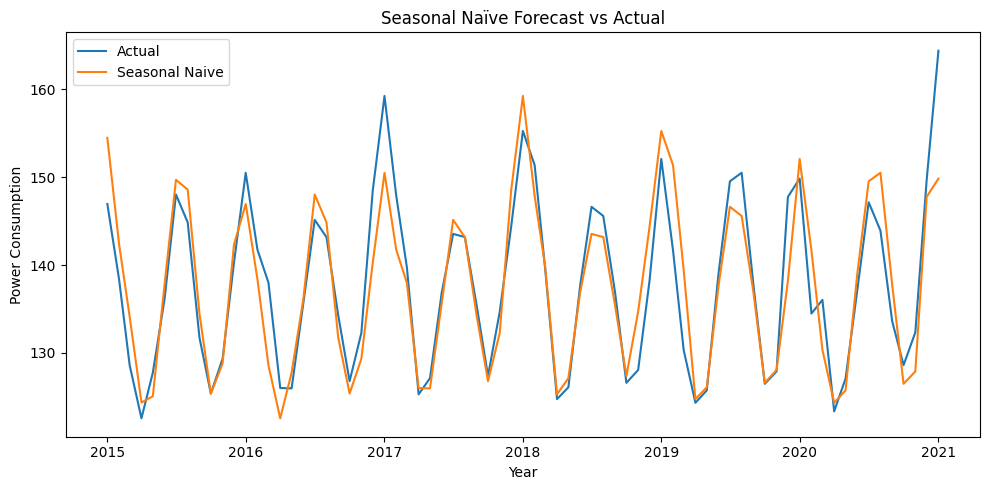

In [5]:

# -----------------------------
# 4. Plot (MATCHES SAMPLE)
# -----------------------------
plot_data = plot_data.loc['2015':'2021']

plt.figure(figsize=(10, 5))

plt.plot(plot_data.index, plot_data['Consumption'],
         label='Actual')

plt.plot(plot_data.index, plot_data['Seasonal_Naive'],
         label='Seasonal Naive')

plt.xlabel('Year')
plt.ylabel('Power Consumption')
plt.title('Seasonal Naïve Forecast vs Actual')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()